## Подсчет количества заявок с сайтов autoprestus.ru и promo.autoprestus.ru

Ищем ответы на следующие вопросы:

1) Распределение заявок между формами и звонками для всех каналов всего ✅

2) Распредление заявок между формами и звонками для Яндекс.Директ ✅

3) Всего заявок с Яндекс.Директ ✅

4) Всего уникальных абонентов с Яндекс.Директ по моделям атрибуции first, last, in-chain

In [17]:
import pandas as pd
import os
import datetime
from gspread_pandas import Spread, Client 
import re

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

In [2]:
cm_df = pd.read_excel('report-call-01092019-31122019.xlsx', header = 4)
cm_df.head()

,Статус,Тип,Дата и время,Номер абонента,Длительность звонка,Длительность ожидания ответа,Сотрудник,ID посетителя,Номер обращения,Теги,ФИО контакта,Рекламная кампания,UTM-метка Source,Страна,Область,Город,UTM-метка Campaign
0,Принятый,Звонок ВАТС,2019-12-31 16:37:59,7.926146e+10,00:04:34,00:00:02,7.495232e+10,NaN,1.0,Отдел Сервиса,NaN,справочники и карты,NaN,NaN,NaN,NaN,NaN
1,Принятый,Звонок ВАТС,2019-12-31 14:05:27,7.962920e+10,00:04:57,00:00:02,7.495232e+10,1.335311e+09,12.0,Отдел Сервиса,NaN,3. SEO,NaN,NaN,NaN,NaN,NaN
2,Принятый,Звонок ВАТС,2019-12-31 14:03:19,7.962920e+10,00:01:52,00:00:02,7.495232e+10,1.335311e+09,11.0,Отдел Сервиса - Финансовый отдел,NaN,3. SEO,NaN,NaN,NaN,NaN,NaN
3,Принятый,Звонок ВАТС,2019-12-31 13:12:18,7.915265e+10,00:02:12,00:00:02,7.495232e+10,NaN,7.0,Отдел Сервиса,NaN,справочники и карты,NaN,NaN,NaN,NaN,NaN
4,Принятый,Звонок ВАТС,2019-12-31 12:47:04,7.925821e+10,00:01:03,00:00:02,7.495232e+10,NaN,2.0,Отдел Сервиса,NaN,3. SEO,NaN,NaN,NaN,NaN,NaN


In [47]:
ck_df = pd.read_excel('2020-01-28T16-43-42+03-00.5e303a8ed7e09.xls')
ck_df.head()

,Адрес сайта,ID сервиса,Название сервиса,Дата звонка,Время звонка,Дата заказа звонка,Ночной звонок,Тип звонка,Номер попытки,Номер клиента,...,Округ,Запись разговора,Страница откуда был звонок,Страница входа,Просмотрено страниц,Номер визита,Теги,Название формы,Имя клиента,Дополнительная информация с формы
0,autoprestus.ru,29102,АВТОПРЕСТУС_основной сайт,30.12.19,13:30,30.12.2019 13:30:50,Нет,Звонок с виджета. Появление по клику на виджет...,1,79253302908,...,NaN,https://records.callkeeper.ru/recorded/storage...,https://autoprestus.ru/owners/service/maintena...,https://autoprestus.ru/,6,1,NaN,NaN,NaN,NaN
1,autoprestus.ru,23968,Январь,30.12.19,10:32,29.12.2019 23:21:22,Да,Звонок с лидогенератора,2,79036413825,...,NaN,https://records.callkeeper.ru/recorded/storage...,https://autoprestus.ru/,https://autoprestus.ru/,2,1,NaN,NaN,NaN,NaN
2,autoprestus.ru,23968,Январь,30.12.19,10:13,29.12.2019 23:21:22,Да,Звонок с лидогенератора,1,79036413825,...,NaN,https://records.callkeeper.ru/recorded/storage...,https://autoprestus.ru/,https://autoprestus.ru/,2,1,NaN,NaN,NaN,NaN
3,autoprestus.ru,29102,АВТОПРЕСТУС_основной сайт,30.12.19,09:20,30.12.2019 09:20:09,Нет,Звонок с мобильного виджета,1,79039618163,...,NaN,https://records.callkeeper.ru/recorded/storage...,https://autoprestus.ru/owners/,https://autoprestus.ru/,4,1,NaN,NaN,NaN,NaN
4,autoprestus.ru,29102,АВТОПРЕСТУС_основной сайт,29.12.19,14:02,29.12.2019 14:02:10,Нет,Звонок с виджета. Появление по времени,1,79154313973,...,NaN,https://records.callkeeper.ru/recorded/storage...,https://autoprestus.ru/owners/repair/,https://autoprestus.ru/,8,1,NaN,NaN,NaN,NaN


##### Из статистики видно, что не все заказанные звонки в отчете колкипера являются успешными
В дальнейшем имеет смысл попробовать считать только успешные заявки звонка, а не все подряд

In [49]:
ck_df[ck_df['Статус звонка'] == 'Оператор не дождался соединения']

,Адрес сайта,ID сервиса,Название сервиса,Дата звонка,Время звонка,Дата заказа звонка,Ночной звонок,Тип звонка,Номер попытки,Номер клиента,...,Округ,Запись разговора,Страница откуда был звонок,Страница входа,Просмотрено страниц,Номер визита,Теги,Название формы,Имя клиента,Дополнительная информация с формы
2,autoprestus.ru,23968,Январь,30.12.19,10:13,29.12.2019 23:21:22,Да,Звонок с лидогенератора,1,79036413825,...,NaN,https://records.callkeeper.ru/recorded/storage...,https://autoprestus.ru/,https://autoprestus.ru/,2,1,NaN,NaN,NaN,NaN
5,autoprestus.ru,29102,АВТОПРЕСТУС_основной сайт,29.12.19,10:39,29.12.2019 10:01:13,Нет,Звонок с мобильного виджета,3,79036213640,...,NaN,https://records.callkeeper.ru/recorded/storage...,https://autoprestus.ru/,https://autoprestus.ru/,2,1,NaN,NaN,NaN,NaN
6,autoprestus.ru,29102,АВТОПРЕСТУС_основной сайт,29.12.19,10:20,29.12.2019 10:01:13,Нет,Звонок с мобильного виджета,2,79036213640,...,NaN,https://records.callkeeper.ru/recorded/storage...,https://autoprestus.ru/,https://autoprestus.ru/,2,1,NaN,NaN,NaN,NaN
7,autoprestus.ru,29102,АВТОПРЕСТУС_основной сайт,29.12.19,10:01,29.12.2019 10:01:13,Нет,Звонок с мобильного виджета,1,79036213640,...,NaN,https://records.callkeeper.ru/recorded/storage...,https://autoprestus.ru/,https://autoprestus.ru/,2,1,NaN,NaN,NaN,NaN
10,autoprestus.ru,29102,АВТОПРЕСТУС_основной сайт,27.12.19,10:40,27.12.2019 00:36:00,Да,Звонок с виджета. Появление на выходе,3,79851818912,...,NaN,https://records.callkeeper.ru/recorded/storage...,https://autoprestus.ru/purchase/available-cars...,https://autoprestus.ru/,8,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,promo.autoprestus.ru,7420,Новая Дин. Общая 20.07,01.09.19,17:25,01.09.2019 17:09:35,Нет,"Звонок, заказанный с формы Facebook",2,79140253697,...,NaN,https://records.callkeeper.ru/recorded/storage...,(none),(none),1,1,NaN,NaN,NaN,NaN
2823,promo.autoprestus.ru,28403,АВТОПРЕСТУС_лендинг,01.09.19,17:10,01.09.2019 16:35:58,Нет,Звонок с виджета. Появление по времени,3,79031403082,...,NaN,https://records.callkeeper.ru/recorded/storage...,http://promo.autoprestus.ru/,http://promo.autoprestus.ru/,2,1,NaN,NaN,NaN,NaN
2825,promo.autoprestus.ru,28403,АВТОПРЕСТУС_лендинг,01.09.19,16:53,01.09.2019 16:35:58,Нет,Звонок с виджета. Появление по времени,2,79031403082,...,NaN,https://records.callkeeper.ru/recorded/storage...,http://promo.autoprestus.ru/,http://promo.autoprestus.ru/,2,1,NaN,NaN,NaN,NaN
2826,promo.autoprestus.ru,28403,АВТОПРЕСТУС_лендинг,01.09.19,16:35,01.09.2019 16:35:58,Нет,Звонок с виджета. Появление по времени,1,79031403082,...,NaN,https://records.callkeeper.ru/recorded/storage...,http://promo.autoprestus.ru/,http://promo.autoprestus.ru/,2,1,NaN,NaN,NaN,NaN


### Имеет смысл проверить только заявки в которых статус 'Звонок прошел успешно'

In [58]:
set(ck_df['Статус звонка'])

{'Абонент не найден (клиент)',
 'Абонент не найден (менеджер)',
 'Блокировка по IP',
 'Блокировка по номеру телефона',
 'Дублирующийся звонок',
 'Звонок клиенту не инициирован',
 'Звонок прошел успешно',
 'Клиент временно недоступен',
 'Клиент не взял трубку',
 'Недопустимый номер клиента',
 'Некорректный номер',
 'Ненужный звонок',
 'Ненужный отложенный звонок',
 'Неправильный номер клиента',
 'Номер клиента занят',
 'Оператор временно недоступен',
 'Оператор не дождался соединения',
 'Совпадающие номера'}

In [4]:
ck_df['Дата заказа звонка'] = pd.to_datetime(ck_df['Дата заказа звонка'])
cm_df['Дата и время'] = pd.to_datetime(cm_df['Дата и время'])

In [5]:
ck_df['Источник перехода (utm_source)'] = ck_df['Источник перехода (utm_source)'].fillna('no_info')
ck_df['utm_medium'] = ck_df['utm_medium'].fillna('no_info')
ck_df['utm_complex'] = ck_df['Источник перехода (utm_source)']+'--'+ck_df['utm_medium']

In [6]:
def Comagic_source(source_type):
    dictionary = {
        '3. SEO':'seo phone',
        'Google.Визитка':'google adwords vc phone',
        'FB/VK/INSTAGRAM':'targeting in sn phone',
        'справочники и карты':'maps phone',
        'Визитки':'search engines vc phone',
        'Яндекс.Визитка':'yandex direct vc phone',
        '2. Google Adwords':'google adwords site phone',
        '7. 2Gis':'2Gis phone',
        'Яндекс.Справочник':'spravochnik yandex phone',
        '6. SMS-рассылка':'sms phone',
        'Соц. сети':'organic in sn phone',
        '1. Яндекс.Директ':'yandex direct phone'
    }
    return dictionary[source_type]

def Callkeeper_source (source_type):
    dictionary= {
        '(direct)--(none)':'direct form',
        '(direct)--no_info':'direct form',
        '(none)--(none)':'direct form',
        'PR-SUPPORT--post':'SMM form',
        'autoprestus.ru--referral':'autoprestus site form',
        'carsdo.ru--referral':'carsdo site form',
        'facebook--cpc':'targeting in sn facebook form',
        'facebook-instagram--no_info':'targeting in sn instagram form',
        'go.mail.ru--organic':'mail search form',
        'google--cpc':'google adwords site form',
        'google--no_info':'google search form',
        'google--organic':'google search form',
        'http://promo.autoprestus.ru/--no_info':'promo autoprestus site form',
        'instagram--cpc':'targeting in sn instagram form',
        'notify.bluecoat.com--referral':'bluecoat site form',
        'vk.com--cpc':'targeting in sn vkontakte form',
        'vk.com--no_info':'SMM form',
        'ya_sprav--cpm':'spravochnik yandex form',
        'yahoo--organic':'yahoo search form',
        'yandex--cpc':'yandex direct form',
        'yandex--no_info':'yandex search form',
        'yandex--organic':'yandex search form'
        
    }
    return dictionary[source_type]


def del_zero_from_tel(string):
    return string.replace('.0','')

In [8]:
cm_df['Номер абонента'] = cm_df['Номер абонента'].astype('str')
ck_df['Номер клиента'] = ck_df['Номер клиента'].astype('str')
ck_df['Номер клиента'] = ck_df['Номер клиента'].fillna('Not recognized')
cm_df['Номер абонента'] = cm_df['Номер абонента'].fillna('Not recognized')

In [10]:
cm_df = cm_df.rename(columns={'Дата и время':'datetime','Номер абонента':'phone'})
ck_df = ck_df.rename(columns={'Дата заказа звонка':'datetime','Номер клиента':'phone'})

ck_df.head()

,Адрес сайта,ID сервиса,Название сервиса,Дата звонка,Время звонка,datetime,Ночной звонок,Тип звонка,Номер попытки,phone,...,Запись разговора,Страница откуда был звонок,Страница входа,Просмотрено страниц,Номер визита,Теги,Название формы,Имя клиента,Дополнительная информация с формы,utm_complex
0,autoprestus.ru,29102,АВТОПРЕСТУС_основной сайт,30.12.19,13:30,2019-12-30 13:30:50,Нет,Звонок с виджета. Появление по клику на виджет...,1,79253302908,...,https://records.callkeeper.ru/recorded/storage...,https://autoprestus.ru/owners/service/maintena...,https://autoprestus.ru/,6,1,NaN,NaN,NaN,NaN,google--organic
1,autoprestus.ru,23968,Январь,30.12.19,10:32,2019-12-29 23:21:22,Да,Звонок с лидогенератора,2,79036413825,...,https://records.callkeeper.ru/recorded/storage...,https://autoprestus.ru/,https://autoprestus.ru/,2,1,NaN,NaN,NaN,NaN,(direct)--(none)
2,autoprestus.ru,23968,Январь,30.12.19,10:13,2019-12-29 23:21:22,Да,Звонок с лидогенератора,1,79036413825,...,https://records.callkeeper.ru/recorded/storage...,https://autoprestus.ru/,https://autoprestus.ru/,2,1,NaN,NaN,NaN,NaN,(direct)--(none)
3,autoprestus.ru,29102,АВТОПРЕСТУС_основной сайт,30.12.19,09:20,2019-12-30 09:20:09,Нет,Звонок с мобильного виджета,1,79039618163,...,https://records.callkeeper.ru/recorded/storage...,https://autoprestus.ru/owners/,https://autoprestus.ru/,4,1,NaN,NaN,NaN,NaN,ya_sprav--cpm
4,autoprestus.ru,29102,АВТОПРЕСТУС_основной сайт,29.12.19,14:02,2019-12-29 14:02:10,Нет,Звонок с виджета. Появление по времени,1,79154313973,...,https://records.callkeeper.ru/recorded/storage...,https://autoprestus.ru/owners/repair/,https://autoprestus.ru/,8,1,NaN,NaN,NaN,NaN,google--organic


In [11]:
cm_df['phone'] = cm_df['phone'].map(lambda x: del_zero_from_tel(x))
cm_df['phone'] = cm_df['phone'].map(lambda x: re.sub('\D','',str(x)))
ck_df['phone'] = ck_df['phone'].map(lambda x: re.sub('\D','',str(x)))
ck_df['source_std'] = ck_df['utm_complex'].map(lambda x: Callkeeper_source(x) )
cm_df['source_std'] = cm_df['Рекламная кампания'].map(lambda x: Comagic_source(x) )

In [12]:
complex_df = pd.concat([ck_df[['phone','datetime','source_std']],cm_df[['phone','datetime','source_std']]])
complex_df = complex_df.sort_values(by='datetime').reset_index().drop(['index'],axis = 1)
complex_df['action_type'] = complex_df['source_std'].map(lambda x: x.split(' ')[-1])
complex_df

,phone,datetime,source_std,action_type
0,79687103525,2019-01-09 12:13:07,yandex direct form,form
1,79256063332,2019-01-09 12:23:37,yandex direct form,form
2,79267177571,2019-01-09 14:32:26,yandex direct form,form
3,79670992080,2019-01-09 15:21:08,yandex direct form,form
4,79275932773,2019-01-09 15:37:42,yandex direct form,form
...,...,...,...,...
7100,79258208152,2019-12-31 12:47:04,seo phone,phone
7101,79152652661,2019-12-31 13:12:18,maps phone,phone
7102,79629199873,2019-12-31 14:03:19,seo phone,phone
7103,79629199873,2019-12-31 14:05:27,seo phone,phone


In [15]:
def first_click_datetime (phone,data):
    return data[data['phone']==phone].sort_values(by='datetime')['datetime'].tolist()[0]

def last_click_datetime (phone,data):
    return data[data['phone']==phone].sort_values(by='datetime',ascending=False)['datetime'].tolist()[0]

def chain_of_actions(phone,data):
    return ' --->>> '.join(data[data['phone']==phone].sort_values(by='datetime')['source_std'].tolist())

def chain_of_types(phone,data):
    return ' --->>> '.join(data[data['phone']==phone].sort_values(by='datetime')['action_type'].tolist())

def first_click_source (phone,data):
    return data[data['phone']==phone].sort_values(by='datetime')['source_std'].tolist()[0]

def last_click_source (phone,data):
    return data[data['phone']==phone].sort_values(by='datetime',ascending=False)['source_std'].tolist()[0]

In [16]:
phones_df = pd.DataFrame(set(complex_df['phone']))
phones_df.columns = ['phone']
phones_df['first_ck'] = phones_df['phone'].map(lambda x: first_click_datetime(x,complex_df))
phones_df['last_ck'] = phones_df['phone'].map(lambda x: last_click_datetime(x,complex_df))
phones_df['roadmap'] = phones_df['phone'].map(lambda x: chain_of_actions(x,complex_df))
phones_df = phones_df.sort_values(by='first_ck')
phones_df['typesmap'] = phones_df['phone'].map(lambda x: chain_of_types(x,complex_df))
phones_df['first_source'] =  phones_df['phone'].map(lambda x: first_click_source(x,complex_df))
phones_df['last_source'] =  phones_df['phone'].map(lambda x: last_click_source(x,complex_df))
phones_df.head()

,phone,first_ck,last_ck,roadmap,typesmap,first_source,last_source
3507,79687103525,2019-01-09 12:13:07,2019-01-09 12:13:07,yandex direct form,form,yandex direct form,yandex direct form
2634,79256063332,2019-01-09 12:23:37,2019-01-09 12:23:37,yandex direct form,form,yandex direct form,yandex direct form
3845,79267177571,2019-01-09 14:32:26,2019-01-09 14:32:26,yandex direct form,form,yandex direct form,yandex direct form
3056,79670992080,2019-01-09 15:21:08,2019-09-01 15:00:55,yandex direct form --->>> yandex direct phone,form --->>> phone,yandex direct form,yandex direct phone
1592,79275932773,2019-01-09 15:37:42,2019-01-09 15:37:42,yandex direct form,form,yandex direct form,yandex direct form


In [41]:
spread_export = Spread('1s7lkmaDDc6C3bgkBE8OYT6QYO6ONVg0AmsKLsO21gbg', create_sheet = True, sheet  = 'Autoexport')
spread_export.df_to_sheet(phones_df,start='A1', replace = True, index = False, headers=True)

In [39]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

## Посчитаем распределение заявок между формами и звонками

In [43]:
complex_df.groupby(by = 'action_type').agg(cnt=('action_type','count'))

,cnt
action_type,
form,2835
phone,4270


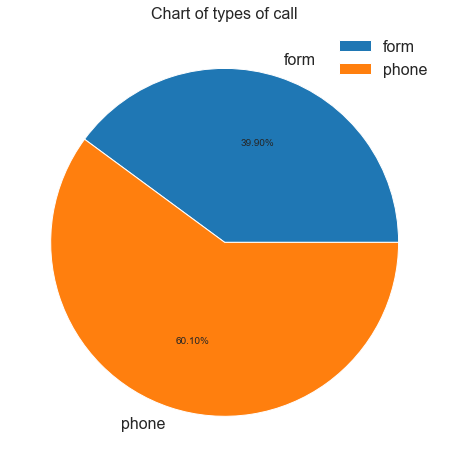

In [40]:
complex_df.groupby(by = 'action_type').agg(cnt=('action_type','count'))\
                        .plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.2f%%')
plt.title("Chart of types of call")
plt.ylabel("")
plt.show()

### Для источника Яндекс.Директ

In [61]:
only_ya_dir = complex_df['source_std'].str.contains('yandex direct')

In [70]:
trafic_ya_dir = 125767
orders_ya_dir = complex_df[only_ya_dir].groupby(by = 'action_type').agg(cnt=('action_type','count'))['cnt'].sum()

print('Всего заявок с Яндекс.Директа:',orders_ya_dir)

print('Конверсия: {:.2%}'.format(orders_ya_dir/trafic_ya_dir))
complex_df[only_ya_dir].groupby(by = 'action_type').agg(cnt=('action_type','count'))

Всего заявок с Яндекс.Директа: 2479
Конверсия: 1.97%


,cnt
action_type,
form,1574
phone,905


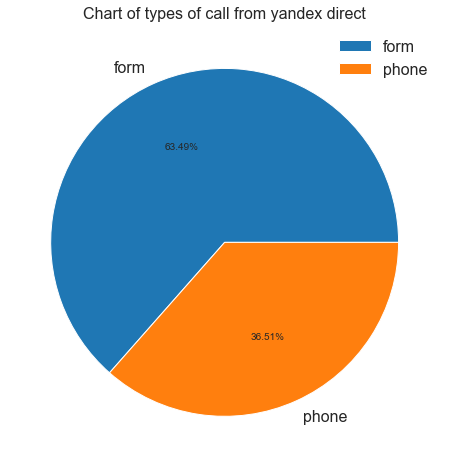

In [62]:
complex_df[only_ya_dir].groupby(by = 'action_type').agg(cnt=('action_type','count'))\
                        .plot(kind='pie', subplots=True, figsize=(8, 8), autopct='%1.2f%%')
plt.title("Chart of types of call from yandex direct")
plt.ylabel("")
plt.show()

### Всего заявок с Яндекс.Директа

In [71]:
print('Всего заявок с Яндекс.Директа:',orders_ya_dir)

Всего заявок с Яндекс.Директа: 2479


### Всего уникальных абонентов с Яндекс.Директ по моделям атрибуции first, last, in-chain

In [72]:
phones_df.head()

,phone,first_ck,last_ck,roadmap,typesmap,first_source,last_source
3507,79687103525,2019-01-09 12:13:07,2019-01-09 12:13:07,yandex direct form,form,yandex direct form,yandex direct form
2634,79256063332,2019-01-09 12:23:37,2019-01-09 12:23:37,yandex direct form,form,yandex direct form,yandex direct form
3845,79267177571,2019-01-09 14:32:26,2019-01-09 14:32:26,yandex direct form,form,yandex direct form,yandex direct form
3056,79670992080,2019-01-09 15:21:08,2019-09-01 15:00:55,yandex direct form --->>> yandex direct phone,form --->>> phone,yandex direct form,yandex direct phone
1592,79275932773,2019-01-09 15:37:42,2019-01-09 15:37:42,yandex direct form,form,yandex direct form,yandex direct form


In [78]:
print('Всего абоенентов: ',phones_df.shape[0])
print('Всего абонентов first click Ya Dir: ',phones_df[phones_df['first_source'].str.contains('yandex direct')].shape[0])
print('Всего абонентов last click Ya Dir: ',phones_df[phones_df['last_source'].str.contains('yandex direct')].shape[0])
print('Всего абонентов in-Chain Ya Dir: ',phones_df[phones_df['roadmap'].str.contains('yandex direct')].shape[0])

Всего абоенентов:  4008
Всего абонентов first click Ya Dir:  1453
Всего абонентов last click Ya Dir:  1430
Всего абонентов in-Chain Ya Dir:  1501
